In [19]:
import sys
sys.path.append('../..')

import canopus
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
from qiskit import QuantumCircuit

### Runtime analysis

In [20]:
qc = QuantumCircuit.from_qasm_file('../../benchmarks/medium/bigadder_n18.qasm')
qc = canopus.rebase_to_canonical(qc)
canopus.utils.canonical_statistics(qc)

Counter({(0.5, 0.0, -0.0): 98, (0.2500000000000003, 0.0, -0.0): 16})

In [21]:
from qiskit.circuit.random import random_clifford_circuit
SEED = 1997
depth = 100
qc = random_clifford_circuit(10, 300, seed=SEED)
# qc = canopus.rebase_to_tk2(qc)
qc = canopus.rebase_to_canonical(qc)

canopus.utils.canonical_statistics(qc)


Counter({(0.5, 0.0, -0.0): 68, (0.5, 0.5, -0.0): 35, (0.5, 0.5, 0.5): 8})

In [67]:
from qiskit.circuit.library import QuantumVolume
SEED = 1997
depth = 200
qc =  QuantumVolume(20, depth, seed=SEED, flatten=True)
qc = canopus.rebase_to_canonical(qc)


canopus.utils.print_circ_info(qc)

+------------+-----------+--------------+-------+----------+
| num_qubits | num_gates | num_2q_gates | depth | depth_2q |
+------------+-----------+--------------+-------+----------+
|     20     |    5702   |     1894     |  401  |   200    |
+------------+-----------+--------------+-------+----------+


In [77]:
depths = [50, 100, 150, 200]
# runtime_rand_10 = np.load('runtime_random_circuit_10.npy')
# runtime_rand_20 = np.load('runtime_random_circuit_20.npy')
runtime_qv_10 = np.load('runtime_quantum_volume_10.npy')
runtime_qv_15 = np.load('runtime_quantum_volume_15.npy')
runtime_qv_20 = np.load('runtime_quantum_volume_20.npy')

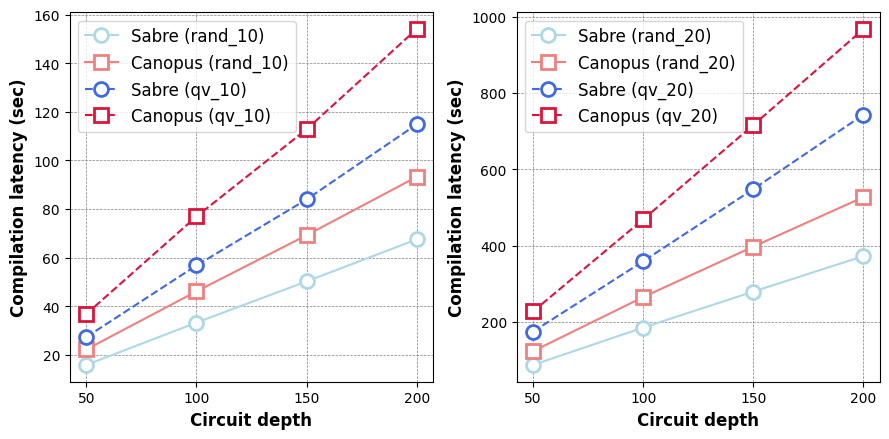

In [24]:
plt.figure(figsize=(9, 4.5))

plt.subplot(1,2,1)
plt.plot(depths, runtime_rand_10[0], 'o-', label='Sabre (rand_10)', markersize=10, color='lightblue', markerfacecolor='white', markeredgewidth=2)
plt.plot(depths, runtime_rand_10[1], 's-', label='Canopus (rand_10)', markersize=10, color='lightcoral', markerfacecolor='white', markeredgewidth=2)
plt.plot(depths, runtime_qv_10[0], 'o--', label='Sabre (qv_10)', markersize=10, color='royalblue', markerfacecolor='white', markeredgewidth=2, )
plt.plot(depths, runtime_qv_10[1], 's--', label='Canopus (qv_10)', markersize=10, color='crimson', markerfacecolor='white', markeredgewidth=2)
plt.legend(fontsize=12)
plt.xticks(depths)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.ylabel('Compilation latency (sec)', fontsize=12, fontweight='bold')
plt.xlabel('Circuit depth', fontsize=12, fontweight='bold')

plt.subplot(1,2,2)
plt.plot(depths, runtime_rand_20[0], 'o-', label='Sabre (rand_20)', markersize=10, color='lightblue', markerfacecolor='white', markeredgewidth=2)
plt.plot(depths, runtime_rand_20[1], 's-', label='Canopus (rand_20)', markersize=10, color='lightcoral', markerfacecolor='white', markeredgewidth=2)
plt.plot(depths, runtime_qv_20[0], 'o--', label='Sabre (qv_20)', markersize=10, color='royalblue', markerfacecolor='white', markeredgewidth=2)
plt.plot(depths, runtime_qv_20[1], 's--', label='Canopus (qv_20)', markersize=10, color='crimson', markerfacecolor='white', markeredgewidth=2)
plt.legend(fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xticks(depths)
plt.ylabel('Compilation latency (sec)', fontsize=12, fontweight='bold')
plt.xlabel('Circuit depth', fontsize=12, fontweight='bold')

plt.tight_layout()

plt.savefig('../figures/runtime.pdf')
plt.show()

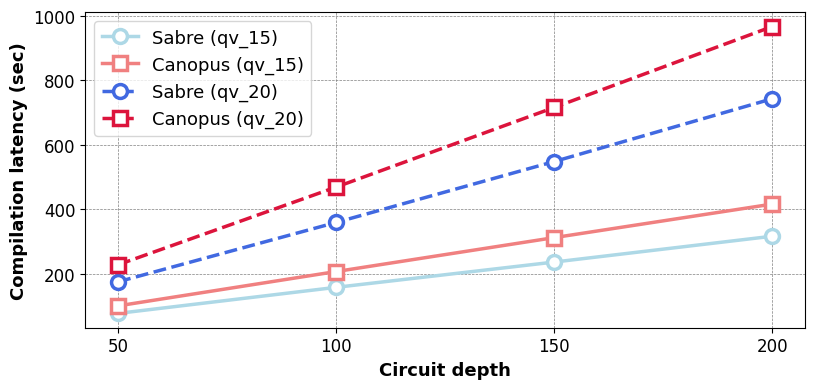

In [87]:
plt.figure(figsize=(8.25, 4))

plt.plot(depths, runtime_qv_15[0], 'o-', label='Sabre (qv_15)', markersize=10, color='lightblue', markerfacecolor='white', markeredgewidth=2.5, linewidth=2.5)
plt.plot(depths, runtime_qv_15[1], 's-', label='Canopus (qv_15)', markersize=10, color='lightcoral', markerfacecolor='white', markeredgewidth=2.5, linewidth=2.5)
plt.plot(depths, runtime_qv_20[0], 'o--', label='Sabre (qv_20)', markersize=10, color='royalblue', markerfacecolor='white', markeredgewidth=2.5, linewidth=2.5)
plt.plot(depths, runtime_qv_20[1], 's--', label='Canopus (qv_20)', markersize=10, color='crimson', markerfacecolor='white', markeredgewidth=2.5, linewidth=2.5)
plt.legend(fontsize=13)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xticks(depths, fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Compilation latency (sec)', fontsize=13, fontweight='bold')
plt.xlabel('Circuit depth', fontsize=13, fontweight='bold')

plt.tight_layout()

plt.savefig('../figures/runtime.pdf')
plt.show()

In [97]:
from scipy.stats import gmean

latency = np.concatenate((runtime_qv_20[1] / runtime_qv_20[0], runtime_qv_15[1] / runtime_qv_15[0]))
m = gmean(latency)
m

1.3085314665074472

In [101]:
100 * ((latency - m) / m)

array([-0.45670795, -0.21798428, -0.1672838 , -0.52526077, -0.31772655,
        0.19367429,  0.97266296,  0.52821778])

In [102]:
latency

array([1.3025553 , 1.30567907, 1.30634251, 1.30165826, 1.30437391,
       1.31106576, 1.32125907, 1.31544336])

In [92]:
print(runtime_qv_15[1] / runtime_qv_15[0])
print(runtime_qv_20[1] / runtime_qv_20[0])

[1.30437391 1.31106576 1.32125907 1.31544336]
[1.3025553  1.30567907 1.30634251 1.30165826]


In [103]:
slope0 = (runtime_qv_15[0][-1] - runtime_qv_15[0][0]) / (depths[-1] - depths[0])
slope1 = (runtime_qv_15[1][-1] - runtime_qv_15[1][0]) / (depths[-1] - depths[0])

slope1 / slope0

1.3189899715421962

In [104]:
slope0 = (runtime_qv_20[0][-1] - runtime_qv_20[0][0]) / (depths[-1] - depths[0])
slope1 = (runtime_qv_20[1][-1] - runtime_qv_20[1][0]) / (depths[-1] - depths[0])

slope1 / slope0

1.301382269620117

In [40]:
np.mean(runtime_rand_20[0] / runtime_rand_10[0]), np.mean(runtime_rand_20[1] / runtime_rand_10[1])

(5.551752316341062, 5.682644381020092)

In [41]:
np.mean(runtime_qv_20[0] / runtime_qv_10[0]), np.mean(runtime_qv_20[1] / runtime_qv_10[1])

(6.4371080930122755, 6.230938059817996)